In [1]:
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

import pandas
import pydicom
import matplotlib.pyplot as plt
import random
import json
import numpy as np

In [2]:
# path of the metadata csv files
metadata_directory = repo_path / 'dataset_analysis/metadata'

# Images with special fov type

In [3]:
# import the csv file with the metadata
metadata = pandas.read_csv(repo_path / 'dataset_analysis/metadata/metadata_FP.csv')
# show all posible values appearing in the fov_type column
FOV_types = metadata['fov_type'].unique()
print(f'FOV types: {FOV_types}')
# count how many images we have in each FOV type
FOV_counts = metadata['fov_type'].value_counts()
print(f'FOV counts: \n{FOV_counts}')

# get all the images with a specific fov type
fov = FOV_types[7]
print(f'FOV type: {fov}')
contact_images = metadata[metadata['fov_type'] == fov]
# count how many clinet_id there are in the contact_images
client_counts = contact_images['client_id'].value_counts()
print(f'Client counts with {fov}: {len(client_counts)}')
# show some images of the same client under these categoriy
client_num = 0
client_example = client_counts.index[client_num] # first client
pick = contact_images[contact_images['client_id'] == client_example] # get df with client pick
paths = pick['path'].values # get the paths
# save as output
pick.to_csv(metadata_directory / 'output.csv', index=False)

FOV types: [nan '2D_BIOPSY' '2D_MAGNIFICATION' '2D_CONTACT' '3D_STANDARD_15P'
 '28616.8' '24910.6' '14956.3' '23215.5' '18813.2' '31125.9' '29538.7'
 '31616.6' '42014.1' '39421.1' '25968.1' '20470.2' '30456.4' '23540.8'
 '20499.3' '24002.4' '21781.5' '28453.3' '15603.2' '29736.6' '28644.8'
 '25379.5' '32016.0' '35841.6' '20000.3' '17887.2' '25443.8' '21006.1'
 '17361.1' '34704.3' '37409.9' '17708.5' '39222.1' '34634.2' '34907.3'
 '30494.9' '17991.6' '18587.9' '33570.2' '27513.3' '25702.0' '23866.7'
 '23698.0' '23286.7' '27124.7' '26815.4' '14897.8' '14935.2' '26000.2'
 '18383.4' '29603.9' '44223.9' '40179.9' '28143.6' '31261.8' '32095.6'
 '31638.2' '23363.3' '21167.8' '22213.0' '18148.6' '29389.9' '27199.0'
 '38499.4' '33737.3' '24699.3' '23929.7' '20850.6' '28507.3' '15741.7'
 '16355.5' '27856.6' '28893.7' '29844.9' '25124.3' '26655.0' '32473.9'
 '17629.4' '19809.2' '38009.5' '44009.9' '28262.9' '43184.3' '20607.8'
 '20679.9' '22907.2' '32985.8' '30294.5' '27345.7' '34281.5' '30992.8'

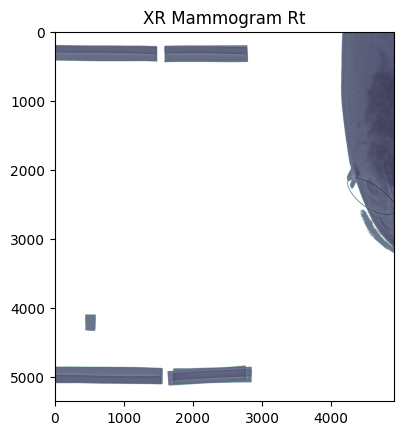

In [4]:
# open the first image and plot it
for i, path in enumerate(paths):
    image = pydicom.dcmread(path)
    # get side from the side_view columno f the pick df
    side = pick.iloc[i]['procedure_descrip']
    plt.figure()
    plt.imshow(image.pixel_array, cmap=plt.cm.bone)
    plt.title(side)

We filter all images with any special FOV type.

In [5]:
# keep only the images with no fov_type
metadata_noFOV = metadata[metadata['fov_type'].isna()]
print(f'Number of images with no fov_type: {len(metadata_noFOV)}')
print(f'The number of clients_id is {len(metadata_noFOV["client_id"].unique())}')
# save metadata_noFOV as csv file
metadata_noFOV.to_csv(metadata_directory / 'metadata_noFOV.csv', index=False)

Number of images with no fov_type: 77035
The number of clients_id is 5982


# Implant

Implant counts: 
NO     74020
YES      299
Name: implant, dtype: int64


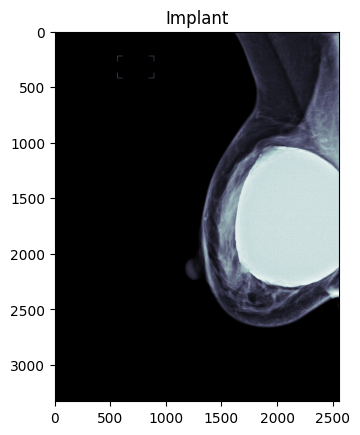

In [6]:
# import the csv file with the metadata
metadata = pandas.read_csv(metadata_directory / 'metadata_noFOV.csv')
# get all unique values for the side_view column and count them
side_counts = metadata['implant'].value_counts()
print(f'Implant counts: \n{side_counts}')
# get images with implant
implant_images = metadata[metadata['implant'] == 'YES']
paths = implant_images['path'].values
path = random.choice(paths)
plt.imshow(pydicom.dcmread(path).pixel_array, cmap=plt.cm.bone)
plt.title('Implant')

# save metadata wihout implant images
metadata_noImplant = metadata[metadata['implant'] != 'YES']
# save
metadata_noImplant.to_csv(metadata_directory /'metadata_noImplant.csv', index=False)

The legth of the no info implant images is 2716


Text(0.5, 1.0, 'No_info_Implant')

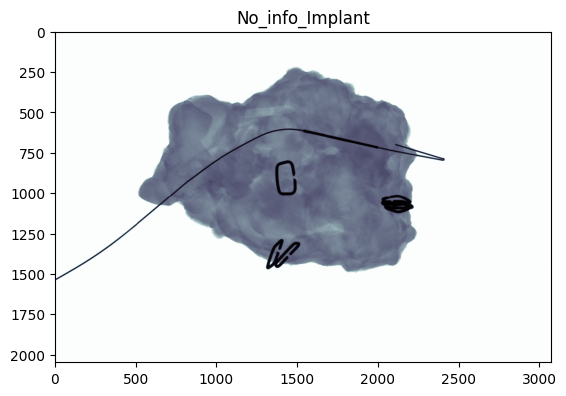

In [7]:
# check images with no information on implant
metadata = pandas.read_csv(metadata_directory / 'metadata_noFOV.csv')
# get images only with empty implant column
noinfo_images = metadata[metadata['implant'].isna()]
print(f'The legth of the no info implant images is {len(noinfo_images)}')
paths = noinfo_images['path'].values
path = random.choice(paths)
plt.imshow(pydicom.dcmread(path).pixel_array, cmap=plt.cm.bone)
plt.title('No_info_Implant')

# Row and column sizes

Row sizes porcentage: 
3328    0.497081
4096    0.226061
707     0.067231
2294    0.059138
794     0.041011
          ...   
3228    0.000013
2550    0.000013
2248    0.000013
1840    0.000013
2340    0.000013
Name: rows, Length: 125, dtype: float64

Row size: 4084
Number of images with row size 4084: 929



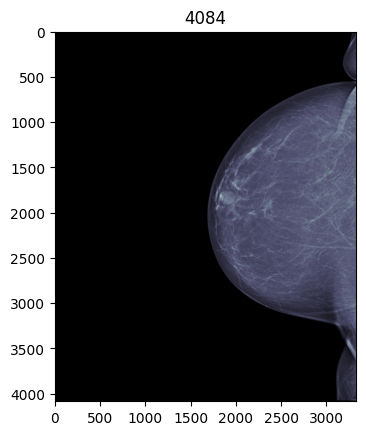

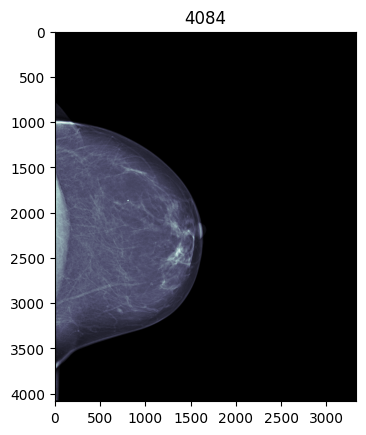

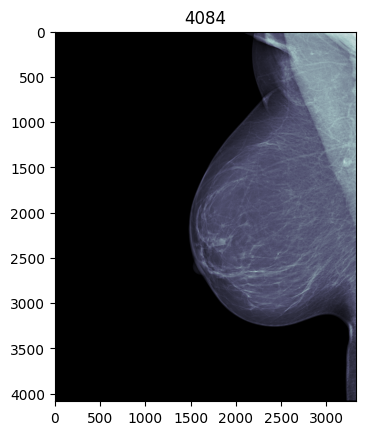

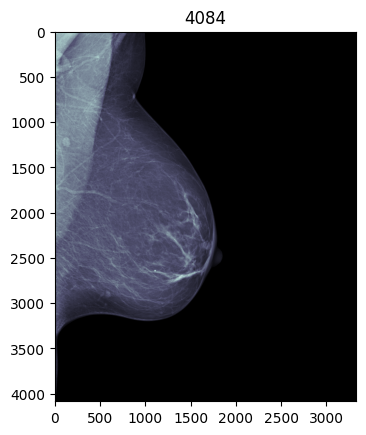

In [16]:
metadata_noImplant = pandas.read_csv(metadata_directory / 'metadata_noImplant.csv')
metadata_len = len(metadata_noImplant)
# get all unique values for the rows column and count them
rows_counts = metadata_noImplant['rows'].value_counts()
# rows_counts.to_csv('metadata/output.csv')
rows_values = rows_counts.index
#print(f'Row sizes counts: \n{rows_counts}\n')
print(f'Row sizes porcentage: \n{rows_counts / metadata_len}\n')
row = rows_values[9]
print(f'Row size: {row}')
print(f'Number of images with row size {row}: {rows_counts[row]}\n')
metadata_rows = metadata_noImplant[metadata_noImplant['rows'] == row]
client = random.choice(metadata_rows['client_id'].unique())
metadata_client = metadata_rows[metadata_rows['client_id'] == client]
metadata_client.to_csv(metadata_directory / 'output.csv', index=False)
paths = metadata_client['path'].values
for path in paths:
    plt.figure()
    plt.imshow(pydicom.dcmread(path).pixel_array, cmap=plt.cm.bone)
    plt.title(f'{row}')

In [ ]:
# save metadata with only row size 3328 and 4096
metadata_Hologic = metadata_noImplant[metadata_noImplant['rows'].isin([3328, 4096])]
metadata_Hologic = metadata_Hologic[metadata_Hologic['manufacturer'] != 'SIEMENS']
print(f'Number of images with row size 3328 or 4096: {len(metadata_Hologic)}')
metadata_Hologic.to_csv('metadata/metadata_Hologic.csv', index=False)

# View position

In [ ]:
# load the metadata_Hologic
metadata_Hologic = pandas.read_csv('metadata/metadata_Hologic.csv')
# get count for view_position
view_position_counts = metadata_Hologic['view_position'].value_counts()
print(f'View position counts: \n{view_position_counts}\n')
viewposition = view_position_counts.index[-3]
print(f'View position: {viewposition}')
metadata_viewposition = metadata_Hologic[metadata_Hologic['view_position'] == viewposition]
print(f'Number of images in {viewposition}: {len(metadata_viewposition)}')
client = random.choice(metadata_viewposition['client_id'].unique())
metadata_client = metadata_viewposition[metadata_viewposition['client_id'] == client]
metadata_client.to_csv('metadata/output.csv', index=False)
paths = metadata_client['path'].values
# for path in paths:
#     plt.figure()
#     plt.imshow(pydicom.dcmread(path).pixel_array, cmap=plt.cm.bone)
#     plt.title(f'{viewposition}')
view_list = ['CC', 'MLO', 'LM', 'ML']
metadata_mainPos = metadata_Hologic[metadata_Hologic['view_position'].isin(view_list)]
print(f'The number of images with main view positions is {len(metadata_mainPos)}')
metadata_mainPos.to_csv('metadata/metadata_mainPos.csv', index=False)

View position counts: 
CC          26980
MLO         22630
LM           3412
ML           2058
XCCL          332
LMO            34
XCCM           25
SPECIMEN       10
RL              3
RM              2
PHANTOM         2
AT              1
TAN             1
Name: view_position, dtype: int64

View position: PHANTOM
Number of images in PHANTOM: 2
The number of images with main view positions is 55080


# Procedure description

In [ ]:
# load the metadata_mainPos
metadata_mainPos = pandas.read_csv('metadata/metadata_mainPos.csv')
# get count for procedure_descrip
procedure_descrip_counts = metadata_mainPos['procedure_descrip'].value_counts()
print(f'Procedure description counts: \n{procedure_descrip_counts}\n')
procedure_descrip = procedure_descrip_counts.index[25]
print(f'Procedure description: {procedure_descrip}')
metadata_procedure_descrip = metadata_mainPos[metadata_mainPos['procedure_descrip'] == procedure_descrip]
print(f'Number of images in {procedure_descrip}: {len(metadata_procedure_descrip)}')
client = random.choice(metadata_procedure_descrip['client_id'].unique())
metadata_client = metadata_procedure_descrip[metadata_procedure_descrip['client_id'] == client]
metadata_client.to_csv('metadata/output.csv', index=False)
paths = metadata_client['path'].values
# for path in paths:
#     plt.figure()
#     plt.imshow(pydicom.dcmread(path).pixel_array, cmap=plt.cm.bone)
#     plt.title(f'{procedure_descrip}')
# selection list
selection_list = ['Screening Mammography', 'Breast Screening', 'Mammography Screening', 'Diagnostic Mammography', 'Standard Screening - Combo',
                  'Mammography Right', 'Mammography Left', 'No Views', 'Symptomatic - Mammogram',
                  ]
metadata_selection = metadata_mainPos[metadata_mainPos['procedure_descrip'].isin(selection_list)]
if len(metadata_selection['procedure_descrip'].value_counts().index) == len(selection_list):
    print(f'Correct input and selection\n The number of images with the selection is {len(metadata_selection)}')
    
    # save 
    metadata_selection.to_csv('metadata/metadata_procedure.csv', index=False)


Procedure description counts: 
Screening Mammography                                               36947
Assessment                                                           3636
Sympto / Assess                                                      3538
Breast Screening                                                     2041
Stereo, LCC                                                          1538
Stereo, RCC                                                          1354
Stereo, RLM                                                          1260
Stereo, LLM                                                          1211
Mammography Screening                                                 978
Diagnostic Mammography                                                700
Stereo, LML                                                           266
Standard Screening - Combo                                            250
Stereo, LMLO                                                          175
Stereo,

# Pixel spacing

In [ ]:
# load the metadata_procedure
metadata_procedure = pandas.read_csv('metadata/metadata_procedure.csv')
# get count for pixel_spacing
pixel_spacing_counts = metadata_procedure['pixel_spacing'].value_counts()
print(f'Pixel spacing counts: \n{pixel_spacing_counts}\n')
pixel_spacing = pixel_spacing_counts.index[-7]
print(f'Pixel spacing: {pixel_spacing}')
metadata_pixel_spacing = metadata_procedure[metadata_procedure['pixel_spacing'] == pixel_spacing]
subdistro = metadata_pixel_spacing['procedure_descrip'].value_counts()
print(f'Subdistro: \n{subdistro}\n')
print(f'Number of images with pixel spacing {pixel_spacing}: {len(metadata_pixel_spacing)}')
client = random.choice(metadata_pixel_spacing['client_id'].unique())
metadata_client = metadata_pixel_spacing[metadata_pixel_spacing['client_id'] == client]
metadata_client.to_csv('metadata/output.csv', index=False)
paths = metadata_client['path'].values
# for path in paths:
#     plt.figure()
#     plt.imshow(pydicom.dcmread(path).pixel_array, cmap=plt.cm.bone)
#     plt.title(f'{pixel_spacing}')
# selection list
selection_list = [pixel_spacing_counts.index[i] for i in [0,1,3]]
print(f'The selected pixel spacing are: {selection_list}')
metadata_pixelspacing = metadata_procedure[metadata_procedure['pixel_spacing'].isin(selection_list)]
if len(metadata_pixelspacing['pixel_spacing'].value_counts().index) == len(selection_list):
    print(f'Correct input and selection\n The number of images with the selection is {len(metadata_pixelspacing)}')
    
    # save 
    metadata_pixelspacing.to_csv('metadata/metadata_pixelspacing.csv', index=False)

Pixel spacing counts: 
0.070000    38109
0.065238     2352
0.038900      586
0.065000      136
0.047000       34
0.046667       24
0.038889       18
0.039000        3
Name: pixel_spacing, dtype: int64

Pixel spacing: 0.065238
Subdistro: 
Breast Screening              2000
Standard Screening - Combo     240
Screening Mammography           72
Symptomatic - Mammogram         32
Diagnostic Mammography           8
Name: procedure_descrip, dtype: int64

Number of images with pixel spacing 0.065238: 2352
The selected pixel spacing are: [0.07, 0.065238, 0.065]
Correct input and selection
 The number of images with the selection is 40597


# Final remarks

- We have 40k images to work with in the vanilla version. Some "bad" images may have snekaed in, but we will use there stochasticiy to our advantage.
- From here, it is worth checking the images last metadata features to be sure that we did not miss anything

## Firewall

In [ ]:
metadata_pixelspacing = pandas.read_csv('metadata/metadata_pixelspacing.csv')
# get study_descrip count
study_descrip_counts = metadata_pixelspacing['study_descrip'].value_counts()
# print(f'Study description counts: \n{study_descrip_counts}\n')
study_descrip = study_descrip_counts.index[-10]
print(f'Study description: {study_descrip}')
metadata_study_descrip = metadata_pixelspacing[metadata_pixelspacing['study_descrip'] == study_descrip]
print(f'Number of images in {study_descrip}: {len(metadata_study_descrip)}')
client = random.choice(metadata_study_descrip['client_id'].unique())
metadata_client = metadata_study_descrip[metadata_study_descrip['client_id'] == client]
metadata_client.to_csv('metadata/output.csv', index=False)
paths = metadata_client['path'].values
# for path in paths:
#     plt.figure()
#     plt.imshow(pydicom.dcmread(path).pixel_array, cmap=plt.cm.bone)
#     plt.title(f'{study_descrip}')

Study description: Assessment
Number of images in Assessment: 15


- No problem was found in images that had study description as Stereo or assessment. This could mean that this images are previous to the intervention.
- Now, saving the images as PNG.
    - Preprocessing:
        - Flipping the right images **to the left** size to have all images aligned.
        - For now, no pixel spacing normalization is done.
        - Intensity normalization is done during dataset preparation at training time.
        - For now, the images are not resized (we have two different sizes)


## Image histogram, dtype and preprocessing

Numpy flip dtype: uint16
OpenCV flip dtype: uint16
Original image dtype: uint16
Read image dtype: uint8
Numpy flip dtype: uint16
OpenCV flip dtype: uint16
Original image dtype: uint16
Read image dtype: uint8
Numpy flip dtype: uint16
OpenCV flip dtype: uint16
Original image dtype: uint16
Read image dtype: uint8
Numpy flip dtype: uint16
OpenCV flip dtype: uint16
Original image dtype: uint16
Read image dtype: uint8
Numpy flip dtype: uint16
OpenCV flip dtype: uint16
Original image dtype: uint16
Read image dtype: uint8
Numpy flip dtype: uint16
OpenCV flip dtype: uint16
Original image dtype: uint16
Read image dtype: uint8
Numpy flip dtype: uint16
OpenCV flip dtype: uint16


/tmp/ipykernel_2455405/272883517.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2, figsize=(15, 5))


Original image dtype: uint16
Read image dtype: uint8
Numpy flip dtype: uint16
OpenCV flip dtype: uint16
Original image dtype: uint16
Read image dtype: uint8
Numpy flip dtype: uint16
OpenCV flip dtype: uint16
Original image dtype: uint16
Read image dtype: uint8
Numpy flip dtype: uint16
OpenCV flip dtype: uint16
Original image dtype: uint16
Read image dtype: uint8


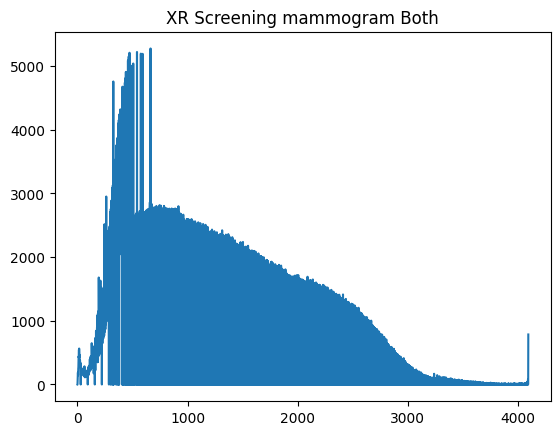

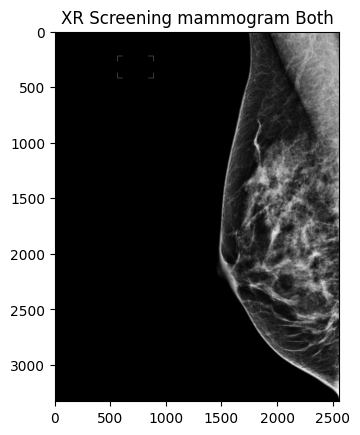

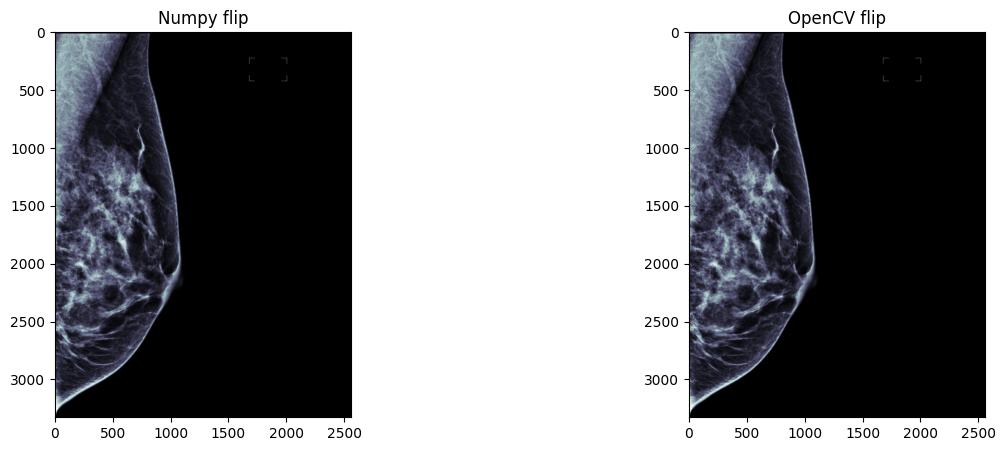

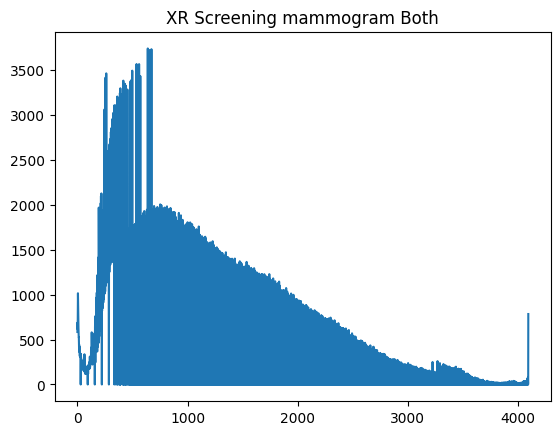

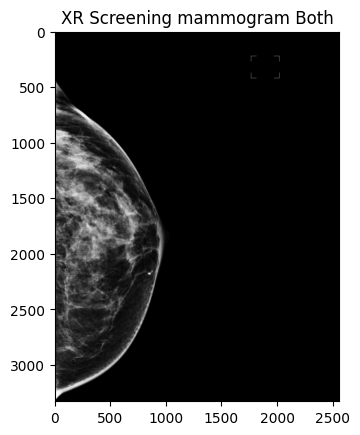

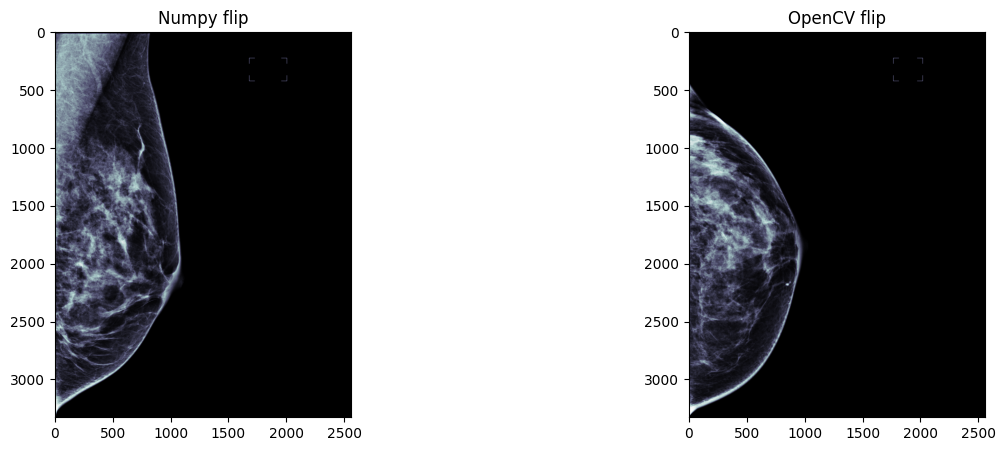

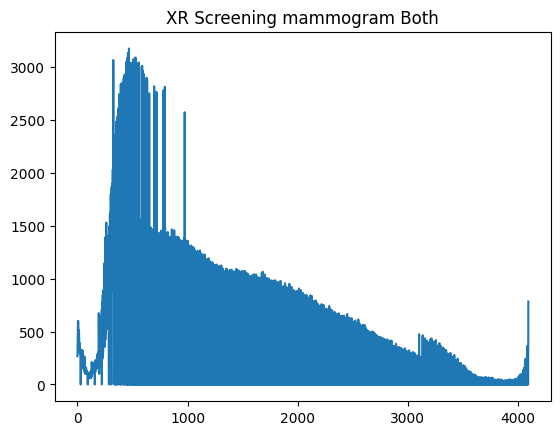

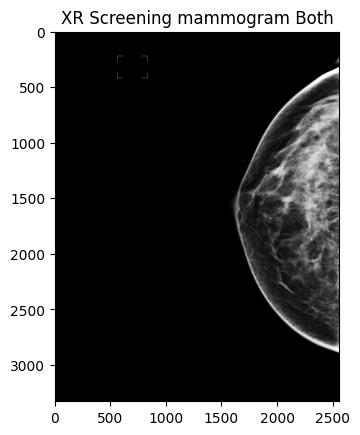

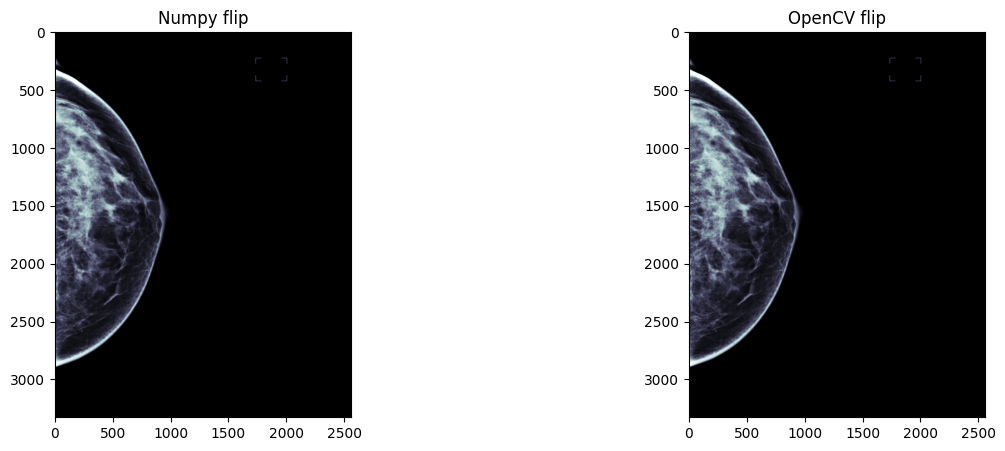

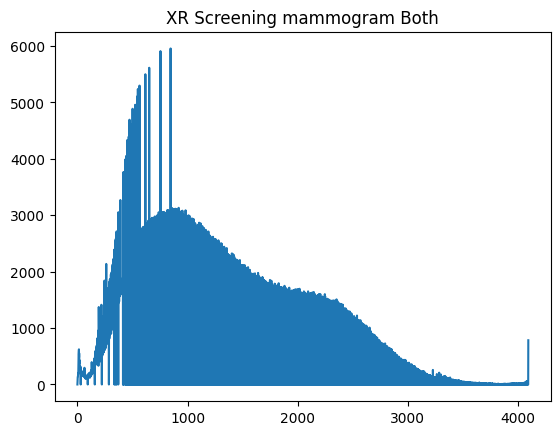

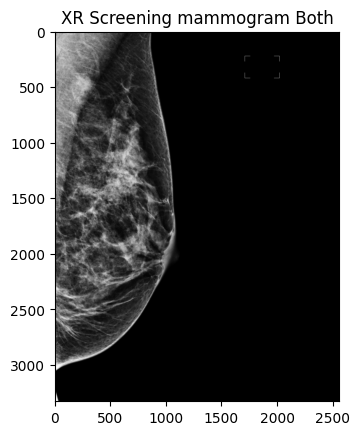

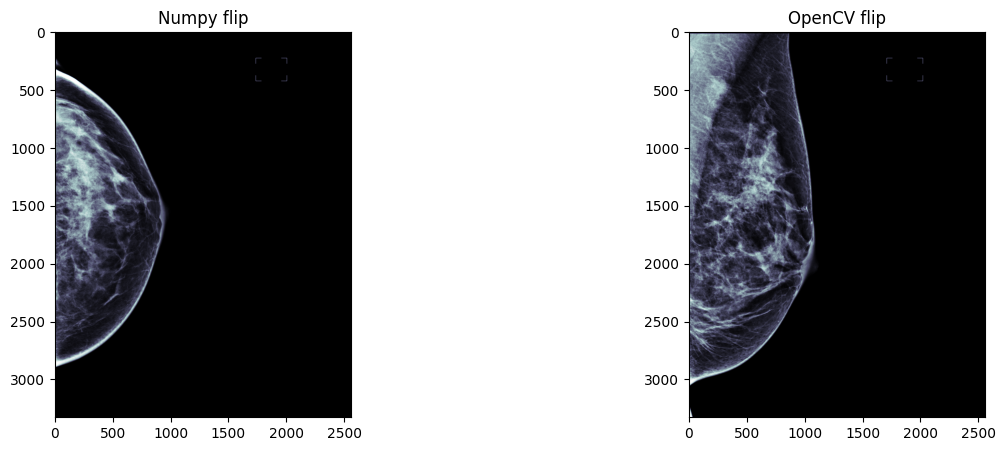

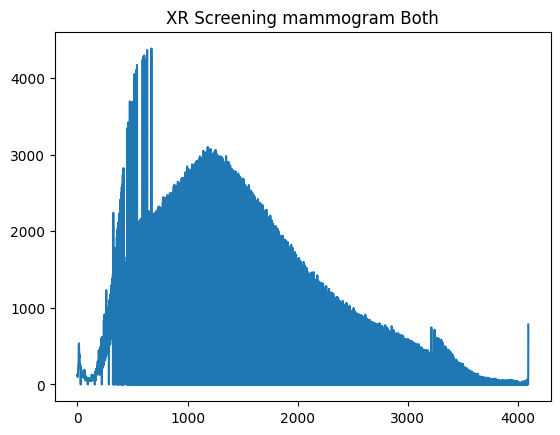

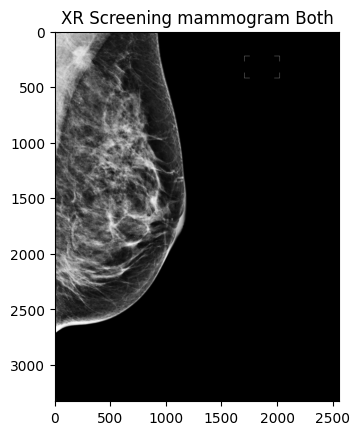

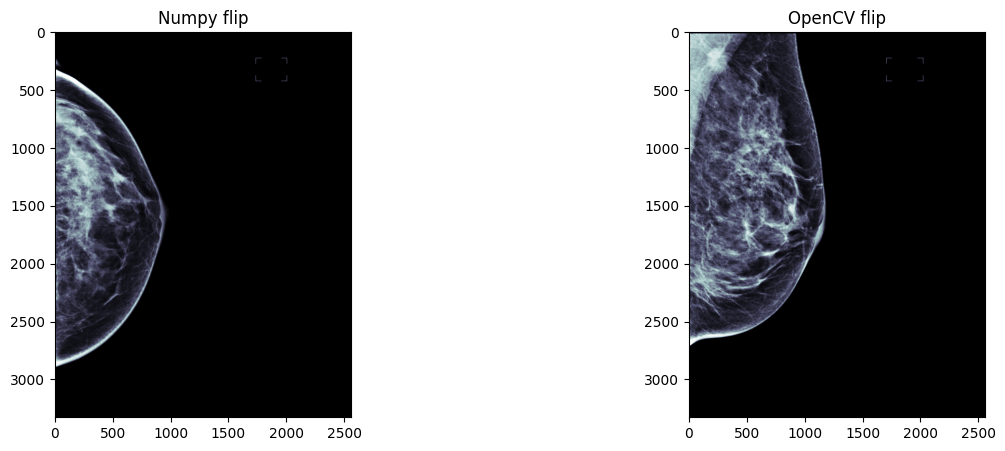

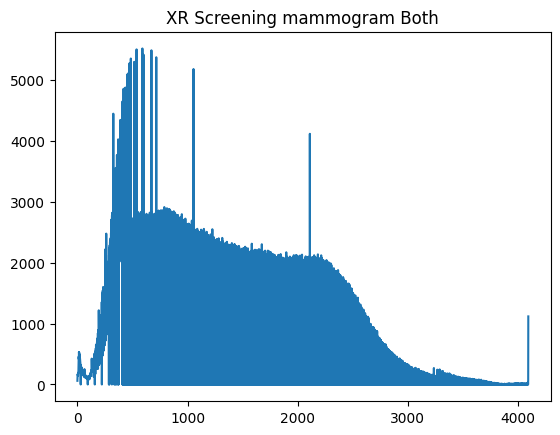

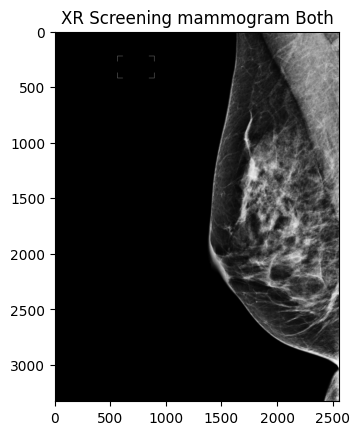

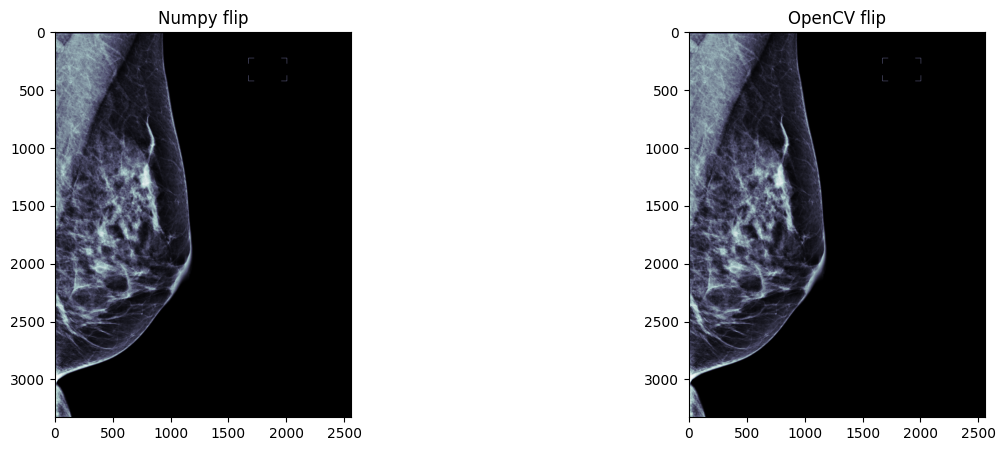

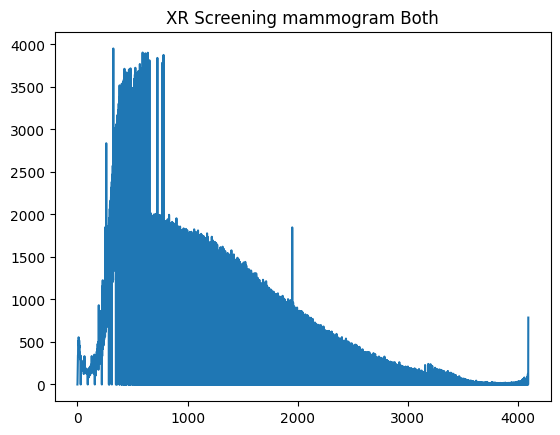

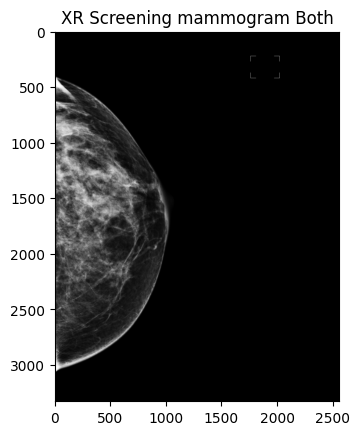

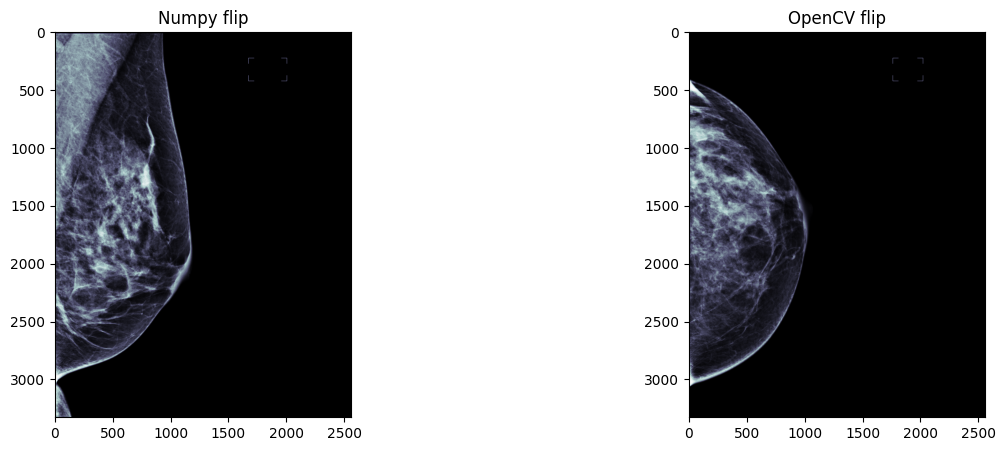

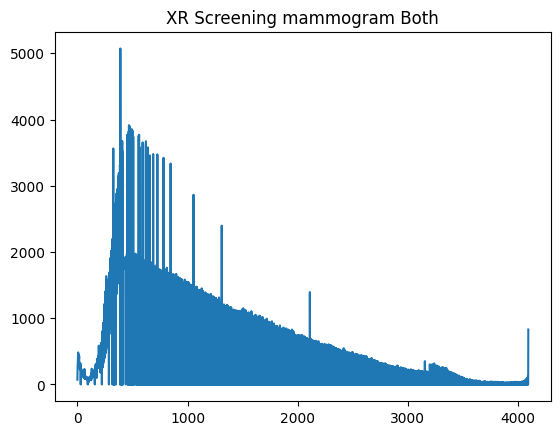

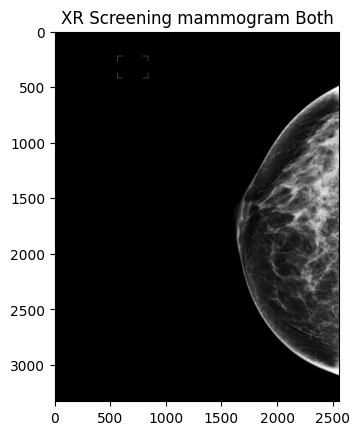

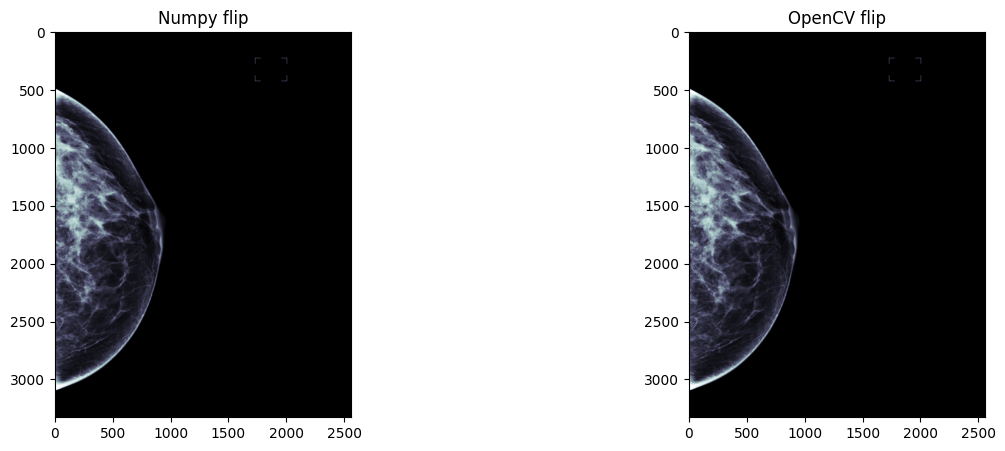

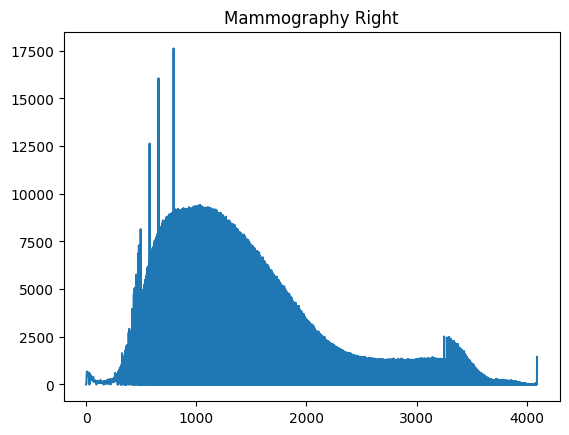

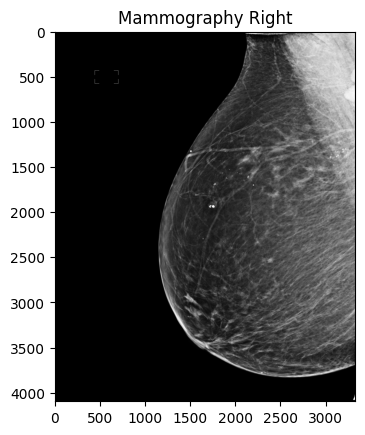

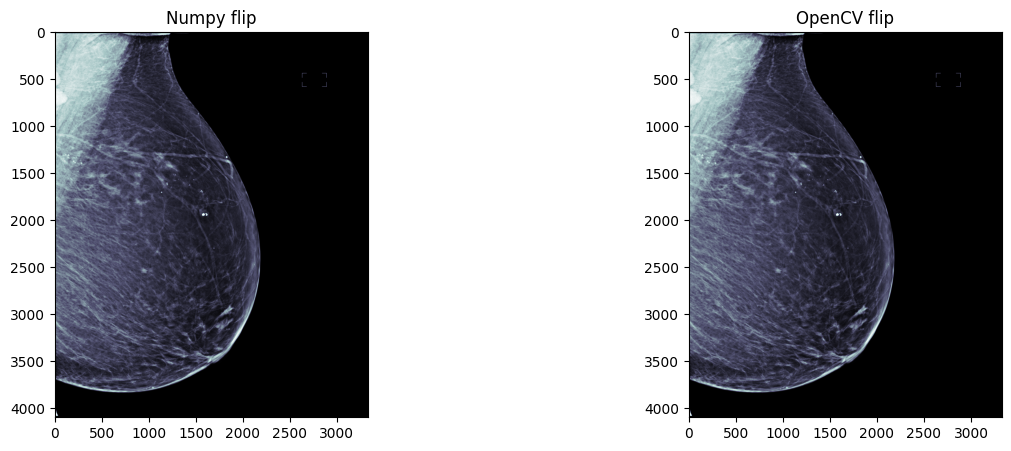

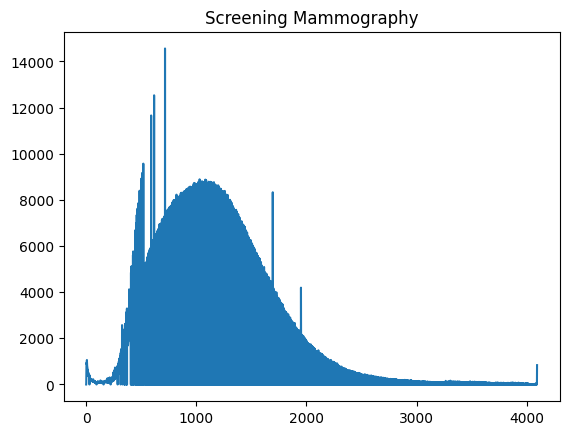

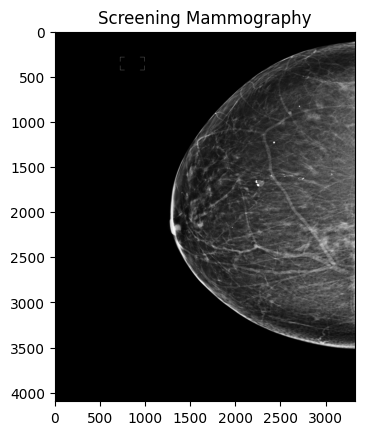

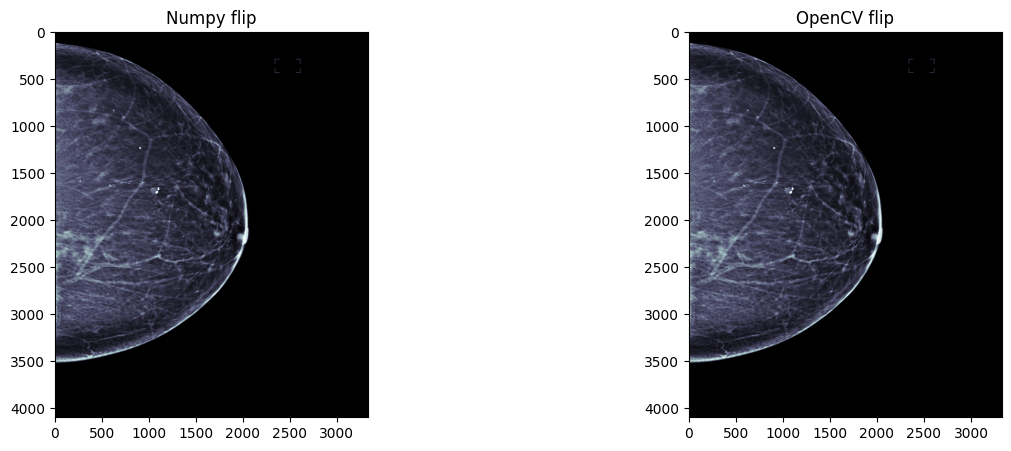

In [ ]:
from pydicom.pixel_data_handlers.util import apply_voi_lut
import cv2 as cv

metadata_final = pandas.read_csv('metadata/metadata_pixelspacing.csv')
paths = metadata_final['path'].values

for i in range(10):
    path = paths[i]

    # load the dicom image
    ds = pydicom.dcmread(path)
    # apply the voi lut
    image_array = apply_voi_lut(ds.pixel_array, ds)
    image_array = np.uint16(image_array)
    # get histogram untul the maximum value
    hist, bins = np.histogram(image_array.flatten(),bins=image_array.max())
    # show histogram
    plt.figure()
    plt.plot(hist[1:])
    plt.title(f'{ds.StudyDescription}')
    # view the image_array
    plt.figure()
    plt.imshow(image_array, cmap='gray')
    plt.title(f'{ds.StudyDescription}')

    # flip right images to the left
    if ds.ImageLaterality == 'R':
        np_flip = np.fliplr(image_array)
        image_array = cv.flip(image_array, 1)
    # show dtypes
    print(f'Numpy flip dtype: {np_flip.dtype}')
    print(f'OpenCV flip dtype: {image_array.dtype}')
    # show flipped images version
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].imshow(np_flip, cmap=plt.cm.bone)
    ax[0].set_title('Numpy flip')
    ax[1].imshow(image_array, cmap=plt.cm.bone)
    ax[1].set_title('OpenCV flip')

    # write image into png
    cv.imwrite(f'images/output{i}.png', image_array)

Be sure that the images read are identical to the ones saved.

Original image dtype: uint16
Read image dtype: uint16


Text(0.5, 1.0, 'Read image')

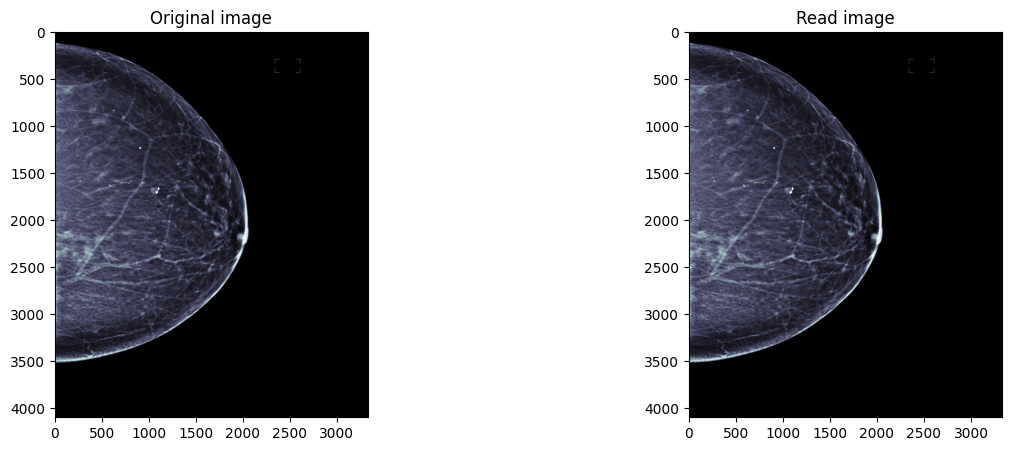

In [ ]:
i = 9
# read image and check that the information is preserved
image_read = cv.imread(f'images/output{i}.png', cv.IMREAD_UNCHANGED)
# compare the original and the read image
print(f'Original image dtype: {image_array.dtype}')
print(f'Read image dtype: {image_read.dtype}')
# show the images
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(image_array, cmap=plt.cm.bone)
ax[0].set_title('Original image')
ax[1].imshow(image_read, cmap=plt.cm.bone)
ax[1].set_title('Read image')

Extra: check that the miage_id is a unique number per image

In [ ]:
metadata_final = pandas.read_csv('metadata/metadata_pixelspacing.csv')
print(f'The length of the metadata is {len(metadata_final)}')
# get the unique image_id
image_ids = metadata_final['image_id'].unique()
print(f'The number of unique image_id is {len(image_ids)}')

The length of the metadata is 40597
The number of unique image_id is 40597


In [ ]:
len(image_ids)//10

4059

# Maximum value per image

- Let's explore the maximum value per image, to know how to normalize the images in the preprocessing step.

In [ ]:
folder_dir = data_dir

# get all images filename
image_paths = [filename for filename in os.listdir(folder_dir)]

# create numoy to store maximum values
max_values = np.zeros(len(image_paths))
# go trhough alll of the,
for i, image_path in enumerate(tqdm(image_paths)):
    # read image using cv2
    image = cv.imread(str(folder_dir / image_path), cv.IMREAD_UNCHANGED)
    # image = Image.open(str(folder_dir / image_path))
    # get maximum value and store it
    max_values[i] = np.max(image)